In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

%matplotlib inline

## **Example: Quadratic Splines**

a) Develop quadratic splines for the following data points in the table below.

b) Using quadratic splines, estimate the value of $f$(3.4) and $f$(2.2).

| x| $f$(x)|
|:---:|:----:|
|1|1|
|2|5|
|2.5|7|
|3|8|
|4|2|

The 3$n$ (i.e. 12 equations ) are:

At end points:
$$a_1(1)^2 + b_1 (1) + c_1 = 1$$
$$a_4(4)^2 + b_4 (4) + c_4 = 2$$

At interior points:
$$a_1(2)^2 + b_1 (2) + c_1 = 5$$
$$a_2(2)^2 + b_2 (2) + c_2 = 5$$
$$a_2(2.5)^2 + b_2 (2.5) + c_2 = 7$$
$$a_3(2.5)^2 + b_3 (2.5) + c_3 = 7$$
$$a_3(3)^2 + b_3 (3) + c_3 = 8$$
$$a_4(3)^2 + b_4 (3) + c_4 = 8$$

Derivatives at interior points:
$$2a_1(2) + b_1 = 2a_2(2) + b_2$$
$$2a_2(2.5) + b_2 = 2a_3(2.5) + b_3$$
$$2a_3(3) + b_3 = 2a_4(3) + b_4$$

Choosing the first spline to be linear:
$$a_1 = 0$$

Since $a_1=0$ ia already known, we solve the remaining 11 equations to obtain the remaining 11 unknowns

$$\begin{bmatrix} 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\ 
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 16 & 4 & 1  \\
 2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
 0 & 0 & 4 & 2 & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\
 0 & 0 & 6.25 & 2.5 & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\
 0 & 0 & 0 & 0 & 0 & 6.25 & 2.5 & 1 & 0 & 0 & 0  \\
 0 & 0 & 0 & 0 & 0 & 9 & 3 & 1 & 0 & 0 & 0  \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 9 & 3 & 1  \\
 1 & 0 & -4 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
 0 & 0 & 5 & 1 & 0 & -5 & -1 & 0 & 0 & 0 & 0   \\
 0 & 0 & 0 & 0 & 0 & 6 & 1 & 0 & -6 & -1 & 0  
\end{bmatrix}
\begin{pmatrix} b_1\\c_1\\a_2 \\ b_2\\c_2\\a_3 \\ b_3\\c_3\\a_4 \\ b_4\\c_4
\end{pmatrix} = \begin{pmatrix} 1\\2\\5 \\ 5\\7\\7 \\ 8\\8\\0 \\ 0\\0
\end{pmatrix}$$

In [2]:
A = np.array([[1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0], 
              [ 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 16 , 4 , 1 ], 
              [2 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ],
              [0 , 0 , 4 , 2 , 1 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 6.25 , 2.5 , 1 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 6.25 , 2.5 , 1 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 9 , 3 , 1 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 9 , 3 , 1],
              [1 , 0 , -4 , -1 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
              [0 , 0 , 5 , 1 , 0 , -5 , -1 , 0 , 0 , 0 , 0],
              [0 , 0 , 0 , 0 , 0 , 6 , 1 , 0 , -6 , -1 , 0 ]])

b = np.array([ 1, 2, 5 , 5 , 7 , 7 , 8 , 8 , 0 , 0 ,0])
x = np.linalg.solve(A,b)

print(x)

[ 4.00000000e+00 -3.00000000e+00 -7.10542736e-17  4.00000000e+00
 -3.00000000e+00 -4.00000000e+00  2.40000000e+01 -2.80000000e+01
 -6.00000000e+00  3.60000000e+01 -4.60000000e+01]


Therefore

$$\begin{pmatrix} b_1\\c_1\\a_2 \\ b_2\\c_2\\a_3 \\ b_3\\c_3\\a_4 \\ b_4\\c_4
\end{pmatrix} = \begin{pmatrix} 4\\-3\\0 \\ 4\\-3\\-4 \\ 24\\-28\\-6 \\ 36\\-46
\end{pmatrix}$$

Since the equation of the splines are (this was discussed in the video on 'Spline Interpolation):

$$f(x) = a_1 x^2 + b_1 x + c_1 $$
$$f(x) = a_2 x^2 + b_2 x + c_2 $$
$$f(x) = a_3 x^2 + b_3 x + c_3 $$
$$f(x) = a_4 x^2 + b_4 x + c_4 $$

We obtain, after plugging in the coefficients above that, the following expressions for the equations of the splines:
$$f(x) =  4 x  -3 $$
$$f(x) =  4 x -3 $$
$$f(x) = -4 x^2 + 24 x -28 $$
$$f(x) = -6 x^2 + 36 x -46 $$

Therefore 
$$f(3.4) = -6 (3.4)^2 + 36 (3.4) -46  = 7.04$$

and

$$f(2.2) = 4 (2.2) -3  = 5.8$$

Before we discuss Cublic Splines, I would like you to learn how to create a tridiagonal matrix. This is because the system of equation for cublic splines is of the form Ax = b, where x and b are vectors and the matrix A is a tridiagonal matrix.

**Exercise: Creating a tridiagonal matrix** 

Given that $$A = \begin{bmatrix} 1 & 8 & 0 & 0 & 0 & 0\\ 13 & 2 & 9 & 0 & 0 & 0\\0 & 14 & 3 & 10 & 0 & 0\\ 0 & 0 & 15 & 4 & 11 & 0 \\0 & 0 & 0 & 16 & 5 & 12 \\ 0 & 0 & 0 & 0 & 17 & 6\end{bmatrix} $$

In [3]:
n = 6
diag = [1, 2, 3, 4, 5, 6] 
diagplus = [7, 8, 9, 10, 11, 12]
diagminus  = [13, 14, 15, 16, 17, 18]

data = np.array([diag,diagminus,diagplus])    

dvals = np.array([0,-1,1])

Amat = spdiags(data, dvals, n, n)
Amat.toarray() 

array([[ 1,  8,  0,  0,  0,  0],
       [13,  2,  9,  0,  0,  0],
       [ 0, 14,  3, 10,  0,  0],
       [ 0,  0, 15,  4, 11,  0],
       [ 0,  0,  0, 16,  5, 12],
       [ 0,  0,  0,  0, 17,  6]])

## Cubic Splines

So, an alternative to our approach above is to use a more less global, or more global approach, in which we do interpolation via piecewise defined functions called _ splines _.  As before, we start our discussion with a data set 

$$
\left\{x_{j},f_{j}\right\}_{j=0}^{n}.
$$

We now define our _cubic splines_ $S_{j}(x)$ to be third order polynomials, i.e. 

$$
S_{j}(x) = a_{j}(x-x_{j})^{3} + b_{j}(x-x_{j})^{2} + c_{j}(x-x_{j}) + d_{j},
$$

such that 

\begin{align}
S_{j}(x_{j}) = & f_{j}, ~ j=0,\cdots,n-1\\
S_{j}(x_{j+1}) = & S_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2 \\
S'_{j}(x_{j+1}) = & S'_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2 \\
S''_{j}(x_{j+1}) = & S''_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2 
\end{align}

which is to say, we require that we interpolate the data, and the each spline as  its first and second derivatives be continuous at each node.  Finally, we require that 

$$
S_{n-1}(x_{n}) = f_{n}, ~ S''_{0}(x_{0})=0, ~ S''_{n-1}(x_{n}) = 0.
$$

We readily see then that $d_{j}= f_{j}$.  Define 

$$
\delta x_{j} = x_{j+1} -x_{j}, ~ \delta f_{j} = f_{j+1} - f_{j}.
$$

Then from above we get the system of equations for  $j=0,\cdots,n-2$

\begin{align}
a_{j}(\delta x_{j})^{2} + b_{j}\delta x_{j} + c_{j} = & \frac{\delta f_{j}}{\delta x_{j}},\\
3a_{j}(\delta x_{j})^{2} + 2b_{j}\delta x_{j} + c_{j} = & c_{j+1},\\
3a_{j}\delta x_{j} + b_{j} = & b_{j+1} 
\end{align}

The end point conditions give us

$$
a_{n-1}\left(\delta x_{n-1}\right)^{2} + b_{n-1}\delta x_{n-1} + c_{n-1} = \frac{\delta f_{n-1}}{\delta x_{n-1}},
$$

and

$$
b_{0}=0, ~ 3a_{n-1}\delta x_{n-1} + b_{n-1} = 0.
$$

Solving for $a_{j}$ gives us, 

$$
a_{j} = \frac{1}{\delta x_{j}^{2}}\left(\frac{\delta f_{j}}{\delta x_{j}} - c_{j} - b_{j}\delta x_{j}\right), ~ j=0,\cdots,n-1,
$$

and in turn we then find that 

\begin{align}
3\frac{\delta f_{j}}{\delta x_{j}} - b_{j}\delta x_{j} - 2c_{j} = & c_{j+1}, ~ j=0,\cdots,n-2\\
3\frac{\delta f_{j}}{(\delta x_{j})^{2}} - 3\frac{c_{j}}{\delta x_{j}} - 2b_{j} = & b_{j+1}, ~j=0,\cdots,n-2,
\end{align}

and

$$
c_{n-1} = \frac{\delta f_{n-1}}{\delta x_{n-1}} - \frac{2}{3}\delta x_{n-1}b_{n-1}.
$$

Likewise, solving for $c_{j}$ then gives us

$$
c_{j} = \frac{\delta f_{j}}{\delta x_{j}} - \frac{\delta x_{j}}{3}\left( 2b_{j} + b_{j+1}\right), ~ j=0,\cdots,n-2.
$$

Ultimately then, we arrive at the system of equations, for $j=1,\cdots,n-3$, 

$$
\frac{\delta x_{j}}{3} b_{j} + \frac{2}{3}\left(\delta x_{j} + \delta x_{j+1} \right)b_{j+1} + \frac{\delta x_{j+1}}{3} b_{j+2} = \frac{\delta f_{j+1}}{\delta x_{j+1}} - \frac{\delta f_{j}}{\delta x_{j}},
$$

and

$$
\frac{2}{3}\left(\delta x_{0} + \delta x_{1} \right)b_{1} + \frac{\delta x_{1}}{3} b_{2} = \frac{\delta f_{1}}{\delta x_{1}} - \frac{\delta f_{0}}{\delta x_{0}},
$$

and

$$
\frac{\delta x_{n-2}}{3} b_{n-2} + \frac{2}{3}\left(\delta x_{n-2} + \delta x_{n-1} \right)b_{n-1} = \frac{\delta f_{n-1}}{\delta x_{n-1}} - \frac{\delta f_{n-2}}{\delta x_{n-2}}.
$$

At this point, we should talk about solving the problem $Ab=\delta f$ where $A$ is a self-adjoint tridiagonal matrix, but that is beyond the scope of this course.  Suffice to say that NumPy makes doing this straightforward and efficient.  This is done in the code below.   

In [4]:
def spline_maker(xvals,fvals,qvals):
    # m = fvals.size
    # note, from above, n = m-1
    
    n = fvals.size - 1
    df = fvals[1:]-fvals[0:n]
    dx = xvals[1:]-xvals[0:n]
    dfdx = df/dx
    svals = np.zeros(qvals.size)
    
    rhs = dfdx[1:] - dfdx[0:n-1]
    diag = 2./3.*(dx[1:] + dx[0:n-1])
    
    data = np.array([diag,dx[1:]/3.,dx[0:n-1]/3.])
    dvals = np.array([0,-1,1])
    Bmat = spdiags(data, dvals, n-1, n-1)
    bvec = spsolve(Bmat,rhs)
    bvec = np.append(0.,bvec)
    
    cvec = dfdx - 2./3.*dx*bvec - dx/3.*np.append(bvec[1:],0.)
    avec = (dfdx - dx*bvec - cvec)/(dx**2.)
    
    for jj in range(1,n+1):
        
        indsr = qvals < xvals[jj] 
        indsl = qvals >= xvals[jj-1]
        inds = indsl*indsr
        
        dxloc = qvals[inds] - xvals[jj-1]
        svals[inds] = avec[jj-1]*dxloc**3. + bvec[jj-1]*dxloc**2. + cvec[jj-1]*dxloc + fvals[jj-1]
        
    return svals

Revisiting the example from above in which 

$$
f(x) = \frac{1}{1+x^{2}}, ~ -1\leq x \leq 1,
$$

we can now test our spline approximation scheme.  As we show, it can be very accurate, and while our arbitrary choice of enforcing zero curvature at the endpoints does cost us some amount of accuracy, we do not have anything resembling the problems we saw above with Lagrange interpolation.  Thus, splines offer us an accurate, efficient, and flexible means of interpolating data. 

/anaconda2/lib/python2.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


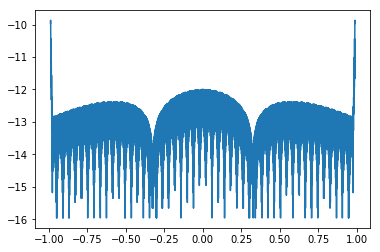

In [5]:
xvs = np.linspace(-1.,1.,int(1e3)+1)
fvs = 1./(1.+xvs**2.)
ivals = np.linspace(-.99,.99,int(5e3))
ftrue = 1./(1.+ivals**2.)

svals = spline_maker(xvs,fvs,ivals)
#plt.plot(ivals,svals,ls='-',color='k')
#plt.plot(ivals,ftrue,ls='--',color='r')
plt.plot(ivals,np.ma.log10(np.abs(ftrue-svals)))